# 01-homework

In [28]:
import pandas as pd
import numpy as np

# Q1 Pandas version

In [29]:
# check pandas version
print(f"Pandas version: {pd.__version__}")

Pandas version: 2.2.3


In [30]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

# open dataset
df = pd.read_csv(data_url)

In [31]:
# show first 10 rows
df.head(10)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


# Q2 Records count

In [33]:
# get number of records in dataset
print(f"Number records: {len(df)}")

Number records: 9704


# Q3 How many fuel types are presented in the dataset?

In [34]:
df['fuel_type'].unique()

array(['Gasoline', 'Diesel'], dtype=object)

# Q4 How many columns in the dataset have missing values?

In [35]:
df.isna().sum()


engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

# Q5 What's the maximum fuel efficiency of cars from Asia?

In [36]:
df['origin'].unique()

array(['Europe', 'USA', 'Asia'], dtype=object)

In [37]:
df[df['origin'] == 'Asia']['fuel_efficiency_mpg'].max()

23.759122836520497

# Q6 Median value of horsepower

Find the median value of horsepower column in the dataset.

Next, calculate the most frequent value of the same horsepower column.

Use fillna method to fill the missing values in horsepower column with the most frequent value from the previous step.

Now, calculate the median value of horsepower once again.

In [11]:
median_horsepower = df['horsepower'].median()
print(f"Median horsepower: {median_horsepower}")


Median horsepower: 149.0


<Axes: >

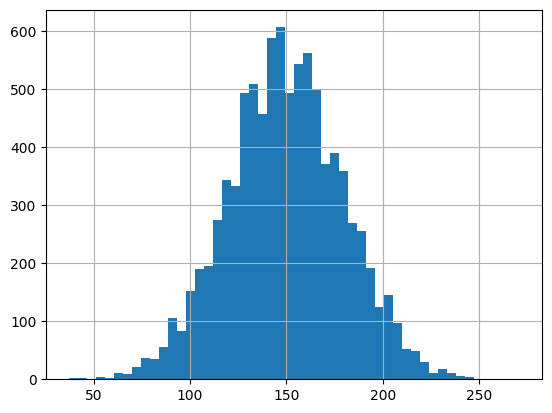

In [12]:
df['horsepower'].hist(bins=50)

In [13]:
most_value_horsepower = df['horsepower'].mode()[0]
print(f"Most value horsepower: {most_value_horsepower}")

Most value horsepower: 152.0


In [14]:
df['horsepower'].isna().sum()

708

In [15]:
# fill missing values in horsepower column with the most frequent value
df['horsepower'] = df['horsepower'].fillna(most_value_horsepower)

In [16]:
new_median_horsepower = df['horsepower'].median()
print(f"New Median horsepower: {new_median_horsepower}")

New Median horsepower: 152.0


In [17]:
new_most_value_horsepower = df['horsepower'].mode()[0]
print(f"New Most value horsepower: {new_most_value_horsepower}")

New Most value horsepower: 152.0


In [18]:
print("Median horse power", median_horsepower)
print("New Median horse power", new_median_horsepower)

Median horse power 149.0
New Median horse power 152.0


Analysis why new median is higher than old median:

Before imputation, median=149 and mode=152. After filling missing value with mode=152, the new median shift to 152.

The median is calculated by first ignoring null values, then sorting the data from lowest to highest and finding the middle value. Before imputation, the median was 149. After replacing the null values with 152, the frequency of 152 increased. When the data was sorted again, these new values shifted the middle position upward, so the median rose to 152.

# Q7 Sum of weights

1. Select all the cars from Asia

2. Select only columns vehicle_weight and model_year

3. Select the first 7 values

4. Get the underlying NumPy array. Let's call it X.

5. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.

6. Invert XTX.

7. Create an array y with values [1100, 1300, 800, 900, 1000, 1100, 1200].

8. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.

9. What's the sum of all the elements of the result?


In [19]:
car_asia = df[df['origin'] == 'Asia'][['vehicle_weight', 'model_year']]

car_asia.head(7)

,vehicle_weight,model_year
8,2714.219310,2016
12,2783.868974,2010
14,3582.687368,2007
20,2231.808142,2011
21,2659.431451,2016
34,2844.227534,2014
38,3761.994038,2019


In [20]:
x = car_asia.head(7).to_numpy()

x

array([[2714.21930965, 2016.        ],
       [2783.86897424, 2010.        ],
       [3582.68736772, 2007.        ],
       [2231.8081416 , 2011.        ],
       [2659.43145076, 2016.        ],
       [2844.22753389, 2014.        ],
       [3761.99403819, 2019.        ]])

In [21]:
# transpose x
xt = x.T

xt

array([[2714.21930965, 2783.86897424, 3582.68736772, 2231.8081416 ,
        2659.43145076, 2844.22753389, 3761.99403819],
       [2016.        , 2010.        , 2007.        , 2011.        ,
        2016.        , 2014.        , 2019.        ]])

In [22]:
# multiply xt and x
xtx = xt.dot(x)

xtx

array([[62248334.33150762, 41431216.5073268 ],
       [41431216.5073268 , 28373339.        ]])

In [23]:
# invert xtx
xtx_inv = np.linalg.inv(xtx)

xtx_inv

array([[ 5.71497081e-07, -8.34509443e-07],
       [-8.34509443e-07,  1.25380877e-06]])

In [24]:
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])

y

array([1100, 1300,  800,  900, 1000, 1100, 1200])

In [25]:
w = xtx_inv.dot(xt).dot(y)

w

array([0.01386421, 0.5049067 ])

In [26]:
w[0]+w[1]

0.5187709081074016